In [1]:
from numpy import corrcoef
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context="talk")

Let's start with a function which simulates replicated brain maps, within as well as between subject. The following function uses a mixture model of Gaussians. The simulations just consist of random gaussian noise. We add a common (random) group map, then a subject-specific (random) map to all replications within a subject. 

In [2]:
def simu_maps(n_voxel, n_replication, n_subject, within, between):
    """ Simulate replication of brain maps within and between subjects
        parameters: 
            n_voxel: the number of voxel value in a map
            n_replication: the number of map replication per subject
            n_subject: the number of subjects
            within: the strength of the within-subject effect
            between: the strength of the between-subject effect 
            
        Returns: y (the maps), gt (ground truth partition into subjects)
    """
    noise = np.random.normal(size=[n_replication , n_voxel]) # Some Gaussian random noise
    gt = np.zeros(shape=[n_replication,1]) # Ground truth clusters
    y = np.zeros(noise.shape) # The final time series
    ind = np.linspace(0,n_replication,n_subject+1,dtype="int") # The indices for each cluster
    map_group = np.random.normal(size=[1, n_voxel]) # a group map common to all subjects
    for ss in range(0, n_subject): # loop over subjects
        cluster = range(ind[ss], ind[ss + 1]) # replications for that particular subject
        map_subject = np.random.normal(size=[1, n_voxel]) # subject-specific map 
        y[cluster, :] = noise[cluster, :] + between * np.repeat(map_group, ind[ss + 1] - ind[ss],0) + within * np.repeat(map_subject, ind[ss + 1] - ind[ss],0) # y = noise + a * signal
        gt[cluster] = ss # Adding the label for cluster in ground truth
    return y, gt

In [3]:
def part2adj(part):
    """ Convert a clustering vector, with integer labels, into an adjancency matrix
    """
    part = np.reshape(part, [part.shape[0], 1])
    adj = np.repeat(part, part.shape[0], 1) == np.repeat(part.transpose(), part.shape[0], 0)
    return adj.astype(int)

In [12]:
y, gt = simu_maps(n_voxel=100, n_replication=40, n_subject=4, within=0.6, between=0.5)

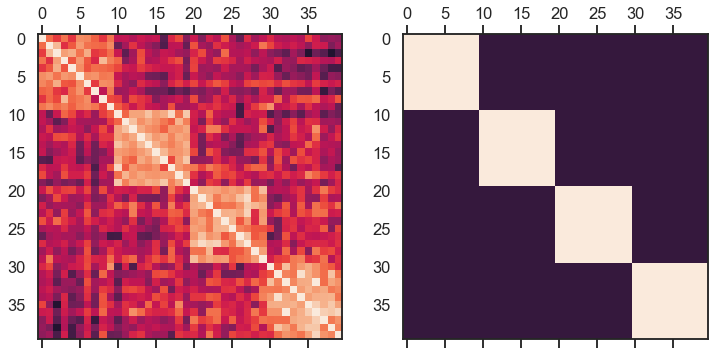

In [13]:
corr_matrix = corrcoef(y)
subjects_effect = part2adj(gt)
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(12, 6))
a = ax1.matshow(corr_matrix, vmin = -0.1, vmax = 0.6)
b = ax2.matshow(subjects_effect, vmin = -0.1, vmax = 0.6)
plt.show()